**Image classification using CNN for CIFAR-10 Data objectives**

In [22]:
# step-1 
# import necessary libraries

from __future__ import print_function
import tensorflow
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Dense, Dropout,Activation,Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

In [23]:
# Load your data and print the shape of training and test samples

(x_train,y_train),(x_test,y_test) = cifar10.load_data()
print('x_train.shape :',x_train.shape)
print('x_test.shape :',x_test.shape)


x_train.shape : (50000, 32, 32, 3)
x_test.shape : (10000, 32, 32, 3)


In [24]:
# 3. Print the shape of one image 
x_train[555].shape
# the shape is 32*32*3 because our image has height - 32 , width 32 and channel 3 

(32, 32, 3)

[1]


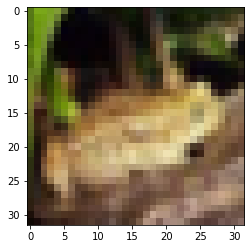

In [25]:
# 4 . Display one image using imshow() function

print(y_train[565])

plt.imshow(x_train[525])

In [26]:
# 5. convert y_train and y_test into categorical values

num_classes = 10
y_train = tensorflow.keras.utils.to_categorical (y_train, num_classes)
y_test =tensorflow.keras.utils.to_categorical(y_test,num_classes)

In [27]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [28]:
# 6. convert train data into float and scale

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

In [8]:
# 7. Build your first CNN
input_shape = (32,32,3)
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2),
                 activation='relu', input_shape = input_shape,padding ='same'))
model.add(Conv2D(32, kernel_size=(5,5),strides=(2,2),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [9]:
#models summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 16, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 3, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                                 
 flatten (Flatten)           (None, 288)               0         
                                                                 
 dense (Dense)               (None, 512)               147968    
                                                        

In [10]:
from keras.backend import categorical_crossentropy
# compile

model.compile (optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.0005,decay=1e-6),
               loss=keras.losses.categorical_crossentropy, metrics =['accuracy'])


In [11]:
model.fit(x_train,y_train,epochs=15,batch_size=32,validation_data=(x_test,y_test),verbose=2,shuffle=True)

Epoch 1/15
1563/1563 - 50s - loss: 1.7329 - accuracy: 0.3655 - val_loss: 1.4447 - val_accuracy: 0.4913 - 50s/epoch - 32ms/step
Epoch 2/15
1563/1563 - 31s - loss: 1.4578 - accuracy: 0.4739 - val_loss: 1.3368 - val_accuracy: 0.5261 - 31s/epoch - 20ms/step
Epoch 3/15
1563/1563 - 34s - loss: 1.3535 - accuracy: 0.5146 - val_loss: 1.2613 - val_accuracy: 0.5537 - 34s/epoch - 22ms/step
Epoch 4/15
1563/1563 - 29s - loss: 1.2849 - accuracy: 0.5420 - val_loss: 1.2142 - val_accuracy: 0.5698 - 29s/epoch - 19ms/step
Epoch 5/15
1563/1563 - 29s - loss: 1.2319 - accuracy: 0.5628 - val_loss: 1.1638 - val_accuracy: 0.5860 - 29s/epoch - 18ms/step
Epoch 6/15
1563/1563 - 30s - loss: 1.1968 - accuracy: 0.5740 - val_loss: 1.2551 - val_accuracy: 0.5687 - 30s/epoch - 19ms/step
Epoch 7/15
1563/1563 - 29s - loss: 1.1712 - accuracy: 0.5863 - val_loss: 1.1775 - val_accuracy: 0.5758 - 29s/epoch - 18ms/step
Epoch 8/15
1563/1563 - 29s - loss: 1.1409 - accuracy: 0.5983 - val_loss: 1.1063 - val_accuracy: 0.6141 - 29s/ep

In [ ]:
model.evaluate(x_test,y_test)

**Model imporvement**

In [29]:
input_shape = (32,32,3)
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=(5,5),strides=(1,1),
                 activation='relu', input_shape = input_shape,padding ='same'))
model1.add(Conv2D(32, kernel_size=(5,5),strides=(1,1),
                 activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Conv2D(32, kernel_size=(5,5),strides=(1,1),
                 activation='relu'))
model1.add(Conv2D(32, kernel_size=(5,5),strides=(1,1),
                 activation='relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(512,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [30]:
model1.compile (optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=0.0005,decay=1e-6),
               loss=keras.losses.categorical_crossentropy, metrics =['accuracy'])


In [ ]:
model1.fit(x_train,y_train,epochs=5,batch_size=32,validation_data=(x_test,y_test),verbose=2)

Epoch 1/5


In [ ]:
model1.evaluate(x_test,y_test)